In [1]:
#!pip install wikipedia
from keras.preprocessing.text import Tokenizer
from gensim.models.fasttext import FastText
import numpy as np
import matplotlib.pyplot as plt
import nltk
from string import punctuation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize
from nltk import WordPunctTokenizer

import wikipedia
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
en_stop = set(nltk.corpus.stopwords.words('english'))

%matplotlib inline

Using TensorFlow backend.
/Users/ishagupta/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/ishagupta/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/ishagupta/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/ishagupta/anaconda3/lib/python3.7/sit

### Scraping data from wiki

In [3]:
artificial_intelligence = wikipedia.page("Artificial Intelligence").content
machine_learning = wikipedia.page("Machine Learning").content
deep_learning = wikipedia.page("Deep Learning").content
neural_network = wikipedia.page("Neural Network").content

artificial_intelligence = sent_tokenize(artificial_intelligence)
machine_learning = sent_tokenize(machine_learning)
deep_learning = sent_tokenize(deep_learning)
neural_network = sent_tokenize(neural_network)

artificial_intelligence.extend(machine_learning)
artificial_intelligence.extend(deep_learning)
artificial_intelligence.extend(neural_network)
artificial_intelligence

['In computer science, artificial intelligence (AI), sometimes called machine intelligence, is intelligence demonstrated by machines, in contrast to the natural intelligence displayed by humans and animals.',
 'Leading AI textbooks define the field as the study of "intelligent agents": any device that perceives its environment and takes actions that maximize its chance of successfully achieving its goals.',
 'Colloquially, the term "artificial intelligence" is often used to describe machines (or computers) that mimic "cognitive" functions that humans associate with the human mind, such as "learning" and "problem solving".As machines become increasingly capable, tasks considered to require "intelligence" are often removed from the definition of AI, a phenomenon known as the AI effect.',
 'A quip in Tesler\'s Theorem says "AI is whatever hasn\'t been done yet."',
 'For instance, optical character recognition is frequently excluded from things considered to be AI, having become a routine 

In [84]:
a=preprocess_text('group of people are standing in front of an audience')


## Cleaning data
#### removing pucntuations
#### removing numbers
####  converting to lower case
####  lemmatizing
#### removing stop words
####  lastly, removing words less than length of 4

In [127]:
import re
from nltk.stem import WordNetLemmatizer

stemmer = WordNetLemmatizer()

def preprocess_text(document):
        # Remove all the special characters
        document = re.sub(r'\W', ' ', str(document))

        # remove all single characters
        document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)

        # Remove single characters from the start
        document = re.sub(r'\^[a-zA-Z]\s+', ' ', document)

        # Substituting multiple spaces with single space
        document = re.sub(r'\s+', ' ', document, flags=re.I)

        # Removing prefixed 'b'
        document = re.sub(r'^b\s+', '', document)

        # Converting to Lowercase
        document = document.lower()

        # Lemmatization
        tokens = document.split()
        tokens = [stemmer.lemmatize(word) for word in tokens]
        tokens = [word for word in tokens if word not in en_stop]
        tokens = [word for word in tokens if len(word) > 2]

        preprocessed_text = ' '.join(tokens)


        return preprocessed_text
    
sent = preprocess_text("Artificial intelligence, is the most advanced technology of the present era")
print(sent)


final_corpus = [preprocess_text(sentence) for sentence in artificial_intelligence if sentence.strip() !='']

word_punctuation_tokenizer = nltk.WordPunctTokenizer()
word_tokenized_corpus = [word_punctuation_tokenizer.tokenize(sent) for sent in final_corpus]

artificial intelligence advanced technology present era


In [150]:
final_cor=list()
for word in list(set(preprocess_text('black dog is running through the grass').split())):
    print(word)
    try:
        final_cor.extend(sent_tokenize(wikipedia.page(word).content)[:200])
    except:
        pass

running
grass
black
dog


In [151]:
final_cor

['Running is a method of terrestrial locomotion allowing humans and other animals to move rapidly on foot.',
 'Running is a type of gait characterized by an aerial phase in which all feet are above the ground (though there are exceptions).',
 'This is in contrast to walking, where one foot is always in contact with the ground, the legs are kept mostly straight and the center of gravity vaults over the stance leg or legs in an inverted pendulum fashion.',
 'A feature of a running body from the viewpoint of spring-mass mechanics is that changes in kinetic and potential energy within a stride occur simultaneously, with energy storage accomplished by springy tendons and passive muscle elasticity.',
 'The term running can refer to any of a variety of speeds ranging from jogging to sprinting.',
 'Running in humans is associated with improved health and life expectancy.It is assumed that the ancestors of humankind developed the ability to run for long distances about 2.6 million years ago, pr

In [152]:
len(final_cor)
word_punctuation_tokenizer = nltk.WordPunctTokenizer()
word_tokenized_corpus = [word_punctuation_tokenizer.tokenize(sent) for sent in final_cor]

embedding_size = 60
window_size = 40
min_word = 5
down_sampling = 1e-2



In [153]:
%%time
ft_model = FastText(word_tokenized_corpus,
                      size=embedding_size,
                      window=window_size,
                      min_count=min_word,
                      sample=down_sampling,
                      sg=1,
                      iter=100)

CPU times: user 18.5 s, sys: 3.02 s, total: 21.5 s
Wall time: 19.7 s


In [161]:
my_list=list()
quote_tags=scraped.keys()
for word in list(set(preprocess_text('black dog is running through the grass').split())):
    for tuple in ft_model.wv.most_similar([word],topn=3):
        my_list.append(tuple[0])


In [164]:
my_list


['Running',
 'runners',
 'runner',
 'grasses',
 'sports',
 ',',
 'color',
 ',"',
 'white',
 'Running',
 'people',
 'running']

In [30]:
embedding_size = 60
window_size = 40
min_word = 5
down_sampling = 1e-2



UsageError: Line magic function `%%time` not found.


In [31]:
%%time
ft_model = FastText(word_tokenized_corpus,
                      size=embedding_size,
                      window=window_size,
                      min_count=min_word,
                      sample=down_sampling,
                      sg=1,
                      iter=100)

CPU times: user 33.1 s, sys: 2.6 s, total: 35.7 s
Wall time: 23.6 s


In [46]:
ft_model.wv.most_similar(['artificial'],topn=5)

[('intelligence', 0.8395699262619019),
 ('inspired', 0.6237903237342834),
 ('technology', 0.5843985080718994),
 ('moral', 0.5352198481559753),
 ('organization', 0.5200638771057129)]

In [49]:
#ft_model.wv['artificial']

semantically_similar_words ={words: [item[0] for item in ft_model.wv.most_similar([words],topn=5)] for words\
                            in ['artificial', 'intelligence', 'machine', 'network', 'recurrent', 'deep']}
for k,v in semantically_similar_words.items():
    print(k+":"+str(v))


artificial:['intelligence', 'inspired', 'technology', 'moral', 'organization']
intelligence:['artificial', 'simulate', 'think', 'intelligent', 'philosophy']
machine:['concerned', 'learning', 'ethic', 'contrast', 'computer']
network:['neural', 'deep', 'connectionist', 'convolutional', 'backpropagation']
recurrent:['rnns', 'semi', 'sequential', 'sequence', 'applied']
deep:['neural', 'network', 'learning', 'speech', 'generative']


In [53]:

from sklearn.decomposition import PCA

all_similar_words = sum([[k] + v for k, v in semantically_similar_words.items()], [])

print(all_similar_words)
print(type(all_similar_words))
print(len(all_similar_words))

ft_model.wv[all_similar_words]

['artificial', 'intelligence', 'inspired', 'technology', 'moral', 'organization', 'intelligence', 'artificial', 'simulate', 'think', 'intelligent', 'philosophy', 'machine', 'concerned', 'learning', 'ethic', 'contrast', 'computer', 'network', 'neural', 'deep', 'connectionist', 'convolutional', 'backpropagation', 'recurrent', 'rnns', 'semi', 'sequential', 'sequence', 'applied', 'deep', 'neural', 'network', 'learning', 'speech', 'generative']
<class 'list'>
36


array([[ 0.42668724,  0.7983597 , -0.47243357, ..., -0.16149402,
        -0.12170402,  0.08764286],
       [ 0.19122224,  0.62768924, -0.3551881 , ..., -0.03353594,
        -0.24324162, -0.44140154],
       [ 0.49455264,  0.5562905 , -1.4504138 , ..., -0.8416325 ,
         0.23252776,  1.2302161 ],
       ...,
       [-0.33186772,  0.1175959 , -0.38926739, ..., -0.18169783,
        -0.03833092, -0.21022847],
       [-0.21654724,  0.52208555, -0.6561294 , ..., -0.5172371 ,
         0.8559007 , -0.26429644],
       [ 0.05371173,  0.5054534 , -0.9960831 , ..., -0.86123526,
         0.5782233 ,  0.5220442 ]], dtype=float32)

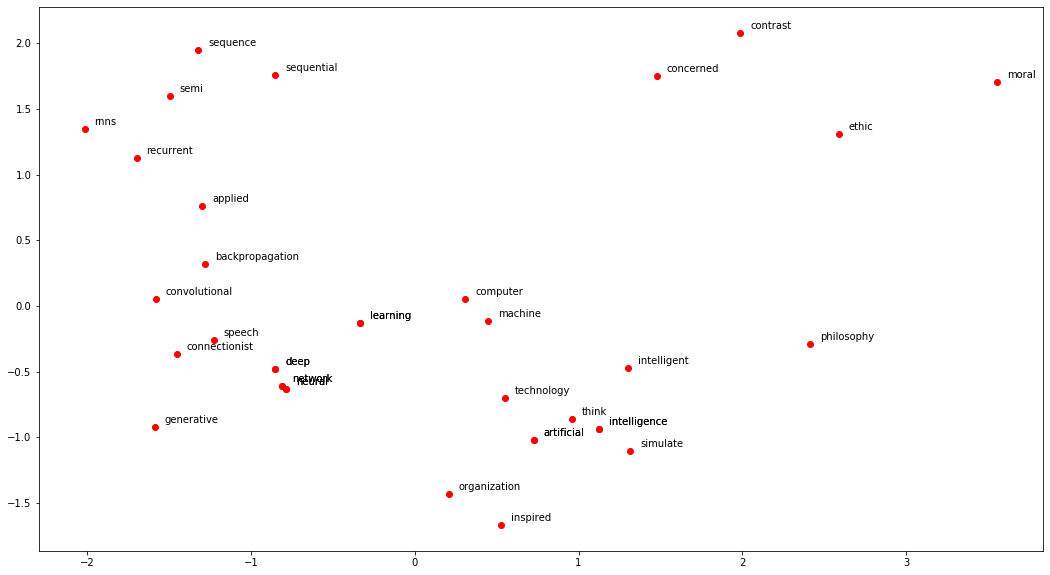

In [63]:
#reduced dimesnions from 60 to 2
pca=PCA(n_components=2)
p_comps=pca.fit_transform(ft_model.wv[all_similar_words])
word_names = all_similar_words

plt.figure(figsize=(18, 10))
plt.scatter(p_comps[:, 0], p_comps[:, 1], c='red')

for word_names, x, y in zip(word_names, p_comps[:, 0], p_comps[:, 1]):
    plt.annotate(word_names, xy=(x+0.06, y+0.03), xytext=(0, 0), textcoords='offset points')

In [69]:
!curl -O https://github.com/facebookresearch/fastText/archive/v0.1.0.zip


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   130  100   130    0     0    828      0 --:--:-- --:--:-- --:--:--   828


In [77]:
# from zipfile import ZipFile
# with ZipFile('v0.1.0.zip', 'r') as zf:
#     zf.extractall('zipped_one_wiki')
!pip install fasttext
import fasttext

## Keras - 2 API - Sequential & functional
The Embedding layer expects the words to be in numeric form. herefore, we need to convert the sentences in our corpus to numbers. One way to convert text to numbers is by using the one_hot function from the keras.preprocessing.text library. The function takes sentence and the total length of the vocabulary and returns the sentence in numeric form.

In [79]:
corpus = [
    # Positive Reviews

    'This is an excellent movie',
    'The move was fantastic I like it',
    'You should watch it is brilliant',
    'Exceptionally good',
    'Wonderfully directed and executed I like it',
    'Its a fantastic series',
    'Never watched such a brillent movie',
    'It is a Wonderful movie',

    # Negtive Reviews

    "horrible acting",
    'waste of money',
    'pathetic picture',
    'It was very boring',
    'I did not like the movie',
    'The movie was horrible',
    'I will not recommend',
    'The acting is pathetic'
]

In [85]:
from nltk.tokenize import word_tokenize
word =[]
for sent in corpus:
        word+=word_tokenize(sent)
len(word)

71

#### Method of pre-trained word embeddings - glove

In [93]:
word_tokenizer=Tokenizer()
word_tokenizer.fit_on_texts(corpus)
embedded=word_tokenizer.texts_to_sequences(corpus)

from keras.preprocessing.sequence import pad_sequences
pad_sequences(embedded,10,padding='post')

array([[14,  3, 15, 16,  1,  0,  0,  0,  0,  0],
       [ 4, 17,  6,  9,  5,  7,  2,  0,  0,  0],
       [18, 19, 20,  2,  3, 21,  0,  0,  0,  0],
       [22, 23,  0,  0,  0,  0,  0,  0,  0,  0],
       [24, 25, 26, 27,  5,  7,  2,  0,  0,  0],
       [28,  8,  9, 29,  0,  0,  0,  0,  0,  0],
       [30, 31, 32,  8, 33,  1,  0,  0,  0,  0],
       [ 2,  3,  8, 34,  1,  0,  0,  0,  0,  0],
       [10, 11,  0,  0,  0,  0,  0,  0,  0,  0],
       [35, 36, 37,  0,  0,  0,  0,  0,  0,  0],
       [12, 38,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  6, 39, 40,  0,  0,  0,  0,  0,  0],
       [ 5, 41, 13,  7,  4,  1,  0,  0,  0,  0],
       [ 4,  1,  6, 10,  0,  0,  0,  0,  0,  0],
       [ 5, 42, 13, 43,  0,  0,  0,  0,  0,  0],
       [ 4, 11,  3, 12,  0,  0,  0,  0,  0,  0]], dtype=int32)

Most of the advanced deep learning models involving multiple inputs and outputs use the Functional API.

In [104]:
from numpy import array
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()
glove_file=open('glove.6B/glove.6B.300d.txt',encoding="utf8")
for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions

glove_file.close()

In [26]:
from bs4 import BeautifulSoup
import requests
response = requests.get('https://www.quotery.com/topics/pain')
results_page=BeautifulSoup(response.content,'lxml')
#print(results_page.prettify())
all_a_tags = results_page.find_all('a')
div_tag = results_page.find('div')
#div_tag

In [76]:
!pip install selenium
from selenium import webdriver

driver = webdriver.Chrome(executable_path='/Users/ishagupta/Documents/MSBASPRING2020/chromedriver')

pages=11
scraped = dict()
for i in range(1,pages):
    url = 'http://quotes.toscrape.com/'
    if i ==1:
        url=url
    else:
        url=url+'/page/'+str(i)
    driver.get(url)
    page = driver.page_source
    soup = BeautifulSoup(page, 'html.parser')
    quotes = soup.find_all('div', class_='quote')

    for quote in quotes:
    
        text = quote.find('span', class_='text').text
        author = quote.find('small', class_='author').text
        for tags in quote.find('div', class_='tags').find_all('a'):
            tag=tags.text
            if scraped.get(tag) is None:
                scraped[tag]=[[text,author]]
            else:
                scraped[tag].append([text,author])
    

In [106]:
import pandas as pd
pd.to_pickle(scraped,'scraped_quotes.pkl')

In [50]:
quotes = soup.find_all('div', class_='quote')
scraped = dict()
for quote in quotes:
    
    text = quote.find('span', class_='text').text
    author = quote.find('small', class_='author').text
    for tags in quote.find('div', class_='tags').find_all('a'):
        tag=tags.text
        if scraped.get(tag) is None:
            scraped[tag]=[text,author]
        else:
            scraped[tag].append([text,author])
    


In [54]:
scraped['change']

['“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”',
 'Albert Einstein']

In [246]:
#quotes

In [86]:
import difflib

['group', 'people', 'standing', 'front', 'audience']

In [165]:
a=preprocess_text('dog swims in the water')
a.split()

b=list()
for word in a.split():
    b.extend(difflib.get_close_matches(word, scraped.keys()))
    
for key in b:
    print(key,':',scraped[key])

wisdom : [['“Any fool can know. The point is to understand.”', 'Albert Einstein']]
simile : [['“A day without sunshine is like, you know, night.”', 'Steve Martin'], ['“Life is like riding a bicycle. To keep your balance, you must keep moving.”', 'Albert Einstein'], ["“He's like a drug for you, Bella.”", 'Stephenie Meyer']]
wander : [['“Not all those who wander are lost.”', 'J.R.R. Tolkien']]
writers : [['“You have to write the book that wants to be written. And if the book will be too difficult for grown-ups, then you write it for children.”', "Madeleine L'Engle"]]
hate : [["“The opposite of love is not hate, it's indifference. The opposite of art is not ugliness, it's indifference. The opposite of faith is not heresy, it's indifference. And the opposite of life is not death, it's indifference.”", 'Elie Wiesel']]


In [170]:
scraped.keys()

dict_keys(['change', 'deep-thoughts', 'thinking', 'world', 'abilities', 'choices', 'inspirational', 'life', 'live', 'miracle', 'miracles', 'aliteracy', 'books', 'classic', 'humor', 'be-yourself', 'adulthood', 'success', 'value', 'love', 'edison', 'failure', 'paraphrased', 'misattributed-eleanor-roosevelt', 'obvious', 'simile', 'friends', 'heartbreak', 'sisters', 'courage', 'simplicity', 'understand', 'fantasy', 'navigation', 'activism', 'apathy', 'hate', 'indifference', 'opposite', 'philosophy', 'friendship', 'lack-of-friendship', 'lack-of-love', 'marriage', 'unhappy-marriage', 'contentment', 'fate', 'misattributed-john-lennon', 'planning', 'plans', 'poetry', 'happiness', 'attributed-no-source', 'religion', 'comedy', 'yourself', 'children', 'fairy-tales', 'imagination', 'music', 'learning', 'reading', 'seuss', 'dumbledore', 'misattributed-to-mother-teresa', 'death', 'chocolate', 'food', 'misattributed-to-c-s-lewis', 'knowledge', 'understanding', 'wisdom', 'library', 'read', 'readers', 

In [178]:
!pip install PyDictionary
from PyDictionary import PyDictionary

dictionary=PyDictionary()

  Created wheel for PyDictionary: filename=PyDictionary-1.5.2-py3-none-any.whl size=4740 sha256=2c14dcbd8163513bfe7d5835b552b94017b4a9405720018fb170e83241b0a7f3
  Stored in directory: /Users/ishagupta/Library/Caches/pip/wheels/0c/32/3e/fda11cb6426e5b61e55903e0ccae40c926ef194977001e307e
  Created wheel for goslate: filename=goslate-1.5.1-py3-none-any.whl size=11549 sha256=defff776889325bb1b9170c3c7a25ceedd74b8182f39de7d07ad36e6984c3d43
  Stored in directory: /Users/ishagupta/Library/Caches/pip/wheels/16/5c/86/f561bb944dc9f853f9502427bde8fe557a6fafe146d4a432f2
Successfully built PyDictionary goslate


In [255]:
import scipy
scipy.spatial.distance.cosine([1,2,3],[1,2,4])
key_words_prediction.split()

['two', 'dog', 'running', 'snow']

In [221]:
dist = np.linalg.norm(vec1-vec2)

vec1=a['group']
vec2=a['people']
vec3=a['standing']
sim1=0
sim2=0
sim3=0
a1=''
a2=''
a3=''
for word in list(new_scraped.keys()):
    try:
        vec=a[word]
        if np.linalg.norm(vec1-a[word])>sim1:
            sim1=np.linalg.norm(vec1-a[word])
            a1=word
        if np.linalg.norm(vec2-a[word])>sim2:
            sim2=np.linalg.norm(vec2-a[word])
            a2=word
        #print(word,np.linalg.norm(vec3-a[word]))
        if np.linalg.norm(vec3-a[word])>sim3:
            sim3=np.linalg.norm(vec3-a[word])
            a3=word
    except:
        continue

In [249]:
embeddings=pd.read_pickle('embeddings_dictionary.pkl')

In [270]:
prediction = 'boy is playing soccer'
key_words_prediction = preprocess_text(prediction)
key_word_embeddings=[embeddings[word] for word in key_words_prediction.split()]


In [278]:
closest_tag=dict()
sim=np.zeros(len(key_word_embeddings))
for word in list(scraped.keys()):
    try:
        vec=embeddings[word]
        for i in range(len(key_words_prediction)):

            if 1-scipy.spatial.distance.cosine(key_word_embeddings[i],vec)>sim[i]:
                sim[i]=1-scipy.spatial.distance.cosine(key_word_embeddings[i],vec)
                closest_tag[key_words_prediction.split()[i]]=(sim[i],word)

    except:
        continue
            


In [296]:
print('###############  Choose one of the captions below: ##############')
for tag,values in closest_tag.items():
    print('\t\n\n\',scraped[values[1]][0][0], '\t\tby',scraped[values[1]][0][1])

###############  Choose one of the captions below: ##############
	
 “If you can make a woman laugh, you can make her do anything.” 		by Marilyn Monroe
	
 “There is nothing to writing. All you do is sit down at a typewriter and bleed.” 		by Ernest Hemingway
	
 “The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.” 		by Albert Einstein
